---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Tarea de clasificación simple

### Import required modules and load data file

#### El primer paso en Python que debemos tomar es cargar los módulos necesarios. Además de cargar el conjunto de datos en el marco de datos de un panda.

#### Una vez que hayamos hecho eso, podemos volcar las primeras filas usando el método head para verificar los nombres de las columnas y obtener algunos ejemplos de las primeras instancias.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### Ahora, lo que hago a continuación es definir un diccionario. que toma la etiqueta numérica de una fruta como la clave de entrada. Y devuelve un valor que es una cadena con el nombre de la fruta.

#### Este diccionario simplemente hace que sea más fácil convertir la salida de una predicción del clasificador a algo que una persona puede interpretar más fácilmente, el nombre de una fruta en este caso.

In [3]:
# crea un mapeo tomando el valor de la etiqueta de la fruta con  el nombre de la fruta para facilitar 
#la interpretación de los resultados

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

## Examinando los datos
-------------------------


### El archivo contiene la masa, la altura y el ancho de una selección de naranjas, limones y manzanas. Las alturas se midieron a lo largo del núcleo del fruto. Los anchos eran el ancho más ancho perpendicular a la altura.

##### Pero por ahora, la primera herramienta de visualización que usaremos se llama un gráfico de par de características. ( feature pair plot) y eso se muestra aquí.

Esta gráfica muestra todos los pares posibles de características y produce una gráfica de dispersión para cada par, que muestra cómo las características están correlacionadas entre sí o no.
Cada punto en el diagrama de dispersión representa una fruta, Coloreado según la clase a la que pertenece. Y posicionado usando las parafeaturas asignadas a ese diagrama de dispersión.

A lo largo de la diagonal hay un histograma que muestra la distribución de valores de características para esa característica Así que en este gráfico de pares, las dimensiones que se muestran aquí en orden son, altura, anchura, masa. Y la puntuación de color de los ejemplos de frutas en nuestro conjunto de entrenamiento

Así que la esquina superior izquierda del histograma aquí muestra la distribución de la característica de altura para todas las muestras en el conjunto de entrenamiento. Y el diagrama de dispersión a su derecha inmediata traza el ancho de cada muestra en el eje xy la altura de la muestra en el eje y.



<IPython.core.display.Javascript object>


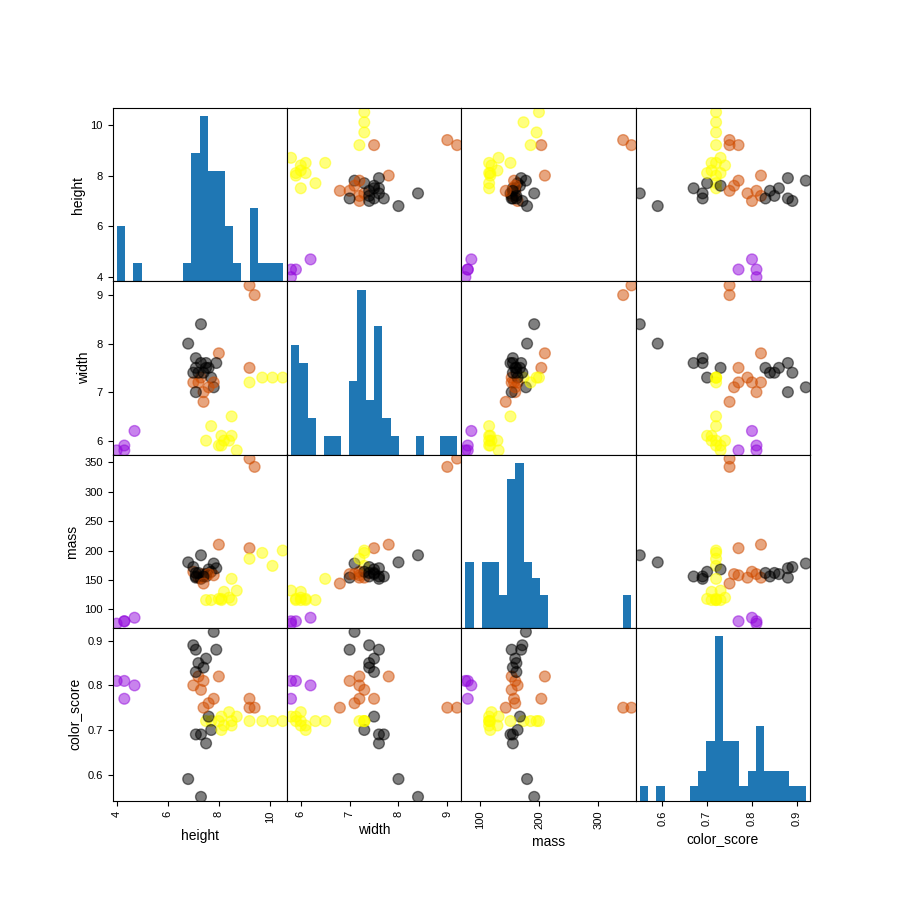

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f668241b320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f667e7fe3c8>]], dtype=object)

In [4]:
# plotting a scatter matrix
from matplotlib import cm

X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# feature pair plot
cmap = cm.get_cmap('gnuplot')
#s = separacion
scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=60, hist_kwds={'bins':20}, figsize=(9,9), cmap=cmap)
scatter

In [ ]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

## Creando la division train-test

#### para este ejemplo definiremos una variable, **X mayuscula** que mantiene las características de nuestro conjunto de datos sin la etiqueta! Y aquí voy a utilizar la masa, el ancho y la altura de la fruta como características.

#### Por lo tanto, esta colección de características se denomina espacio de características.

#### Definimos una segunda variable, **y minuscula** , Para mantener las etiquetas correspondientes a las instancias de X.

Ahora, podemos analizar X and y para la función **train_test_split**

#### Normalmente, esta división en conjuntos de entrenamiento y pruebas se realiza de forma aleatoria, pero para En esta conferencia quiero asegurarme de que todos obtengamos los mismos resultados. Por lo tanto, establezco el parámetro random_state (estado aleatorio) a un valor específico, En este caso me toca elegir cero.

#### Los resultados de la funcion **train_test_split** dividen los datos. Se ponen en las cuatro variables que ves a la izquierda. Y estos están marcados como:

### X_train, X_test, 
### y_train, y y_test. 


In [5]:
# Para este ejemplo, usamos las características de masa, ancho y altura de cada instancia de fruta
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# por defecto la division es 75% / 25% , pero normalmente es aleatorio
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Creando el objeto clasificador

#### Una vez que tengamos nuestra división de los datos, entonces necesitamos crear una instancia del objeto clasificador. Y en este caso un clasificador k-NN.

#### Y el parámetro importante es estableces en este caso el número de vecinos a un valor específico para ser utilizado por el clasificador.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)


## Entrenando al clasificador (ajuste del estimador) usando los datos de entrenamiento

#### Luego entrenamos al clasificador pasando el conjunto de datos establecidos en  X_train, que contiene las caracteristicas de las frutas, y las etiquetas, que estan establecidas en y_train, al método de ajuste de clasificadores.

#### Ahora, el clasificador k-NN que estoy usando en este caso es un ejemplo de una clase más general llamada estimador en scikit-learn. Entonces, todos los estimadores tienen un método de ajuste que toma los datos de entrenamiento, y luego cambia el estado del clasificador, u objeto estimador para habilitar esencialmente la predicción una vez finalizado el entrenamiento.

#### En otras palabras, actualiza el estado de las variables k y n aquí, lo que significa, que en el caso de los vecinos K-Nners memorizará los ejemplos de conjunto de entrenamiento en algún tipo de almacenamiento interno para uso futuro.

In [7]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Estimando la precisión del clasificador para datos futuros, utilizando los datos de prueba

#### Lo primero que podemos hacer con este clasificador recién entrenado es ver cuán preciso es, es probable que esté en algunas instancias nuevas que no se hayan visto anteriormente.

#### Para ello, podemos aplicar el clasificador a todas las instancias (datos) en el conjunto de pruebas. que hemos dejado de lado. Dado que estas instancias de prueba no se incluyeron explícitamente en La formación de clasificadores.

#### Una forma sencilla de evaluar si es probable que el clasificador sea bueno para predecir la etiqueta de las instancias de datos futuros, no vistos, es calcular la precisión del clasificador en los elementos de datos del conjunto de pruebas.

#### Recuerda, que el clasificador k-NN no vio ninguna de las frutas en el set de pruebas durante la fase de entrenamiento.

In [8]:
# Esto tomará los puntos de ajuste de prueba como entrada y calculará la precisión.
# La precisión se define como la fracción de elementos del conjunto de pruebas, 
# cuya verdadera etiqueta fue predicha correctamente por el clasificador.

knn.score(X_test, y_test)

0.53333333333333333


### Usando el modelo de clasificador k-NN entrenado para clasificar objetos nuevos que no se habían visto anteriormente

#### También podemos usar nuestro nuevo clasificador para clasificar instancias individuales de una fruta. De hecho este fue nuestro objetivo en primer lugar. Era poder tomar instancias individuales de objetos y asígnarles una etiqueta, es decir, un nombre de fruta, de acuerdo a sus medidas o caracteristicas

#### Entonces, aquí, por ejemplo. colocare  la masa, anchura y altura para una hipotética pieza de fruta bastante pequeña. Y si le pedimos al clasificador que prediga la etiqueta usando el método de predicción.

#### Podemos ver que la salida es que predice que es una mandarina.


In [9]:
# primer ejemplo: una fruta pequeña con una masa de 20 g, ancho 4.3 cm, altura 5.5 cm

# fuit_prediction, no es más que un arreglo que contiene la etiqueta asignada por el modelo clasificador (pos. O), 
# y las caracteristicas (medidas) que se le pasaron como parametro
fruit_prediction = knn.predict([[20, 4.3, 5.5]])

# Tomamos el diccionario inicial, y le enviamos la etiqueta que fue predicha por el clasificador
# esto nos devuelve el nombre de la fruta
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [10]:
# segundo ejemplo: una fruta más grande y alargada con una masa de 100 g, ancho 6.3 cm, altura 8.5 cm
fruit_prediction = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

### Plot the decision boundaries of the k-NN classifier

<IPython.core.display.Javascript object>


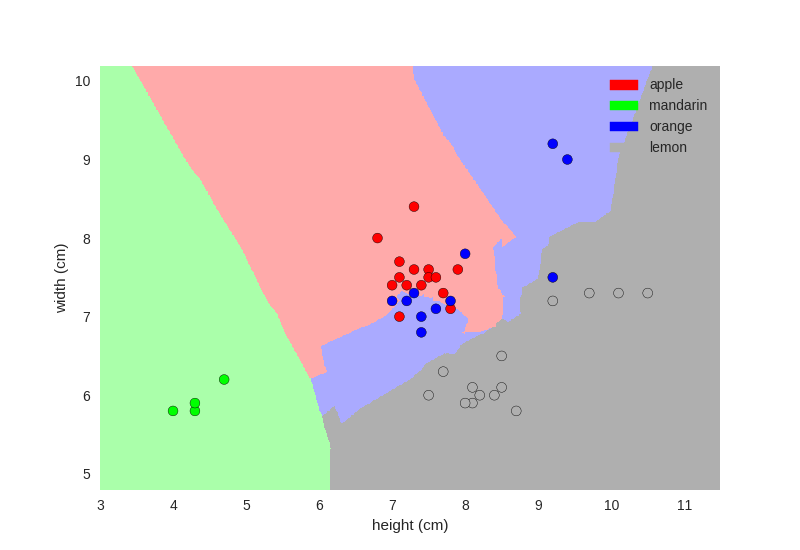

In [11]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

### ¿Qué tan sensible es la precisión de la clasificación k-NN a la elección del parámetro 'k'?

#### cuando K tiene un valor pequeño como 1, el clasificador Es bueno para aprender las clases para puntos individuales en el conjunto de entrenamiento. Pero con un límite de decisión que está fragmentado con una variación considerable.

#### Esto se debe a que cuando K = 1, la predicción es sensible al ruido, los valores atípicos, Datos mal etiquetados y otras fuentes de variación en puntos de datos individuales.

#### Para valores mayores de K, las áreas asignadas a diferentes clases son más suaves y no tan fragmentadas y más robustas al ruido en los puntos individuales. Pero posiblemente con algunos errores, más errores en puntos individuales. Este es un ejemplo de lo que se conoce como la compensación de la desviación del sesgo. 


In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

#### Tenga en cuenta que estos resultados son sólo para esta prueba de entrenamiento particular.

#### Para obtener una estimación más confiable de la precisión futura probable para un valor particular de K, nos gustaría ver los resultados en múltiples divisiones de prueba de tren posibles. 

#### En general, la mejor elección del valor de k, que es la que conduce a La mayor precisión, puede variar mucho dependiendo del conjunto de datos.  el uso de un k más grande suprime los efectos de las etiquetas individuales ruidosas. Pero resulta en límites de clasificación que son menos detallados.

### How sensitive is k-NN classification accuracy to the train/test split proportion?

In [ ]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');